#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/PM10_Prediction/New_data1.csv',encoding='utf-8')

In [ ]:
df.head()

,Unnamed: 0,T,TM,Tm,H,PP,VV,V,VM,PM10
0,0,20.1,28.4,15.7,54,0,6,3,5.4,106
1,1,20.8,28.3,12.9,45,0,6.3,1.1,5.4,97.4
2,2,21.4,29,13.7,45,0,6.3,0.4,3.5,105.33
3,6,21,28.7,17,65,0,6.3,3.1,5.4,74.04
4,7,20.4,27.6,16.2,61,0,5.5,1.3,5.4,63.57


In [ ]:
df=df.rename({'T': 'Avg temp','TM':'Max temp','Tm':'Min temp','H':'Avg relative humidity','PP':'Total rainfall','VV':'Avg visibility','V':'Avg wind speed','VM':'Max wind speed'},axis=1)

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

#Handling Null Values

In [ ]:
df.head()

,Avg temp,Max temp,Min temp,Avg relative humidity,Total rainfall,Avg visibility,Avg wind speed,Max wind speed,PM10
0,20.1,28.4,15.7,54,0,6,3,5.4,106
1,20.8,28.3,12.9,45,0,6.3,1.1,5.4,97.4
2,21.4,29,13.7,45,0,6.3,0.4,3.5,105.33
3,21,28.7,17,65,0,6.3,3.1,5.4,74.04
4,20.4,27.6,16.2,61,0,5.5,1.3,5.4,63.57


Observed that there are '-' (hyphen) symbol in place of numeric values, replacing with NaN values

Also, hyphen values are observed only in specific columns

In [ ]:
df.loc[df['Avg temp']=='-']

,Avg temp,Max temp,Min temp,Avg relative humidity,Total rainfall,Avg visibility,Avg wind speed,Max wind speed,PM10
162,-,-,-,-,-,-,-,-,142.17
187,-,-,-,-,-,-,-,-,130.6
374,-,-,-,-,-,-,-,-,76.69
509,-,-,-,-,-,-,-,-,64.28
513,-,-,-,-,-,-,-,-,77.15
542,-,-,-,-,-,-,-,-,163.24
543,-,-,-,-,-,-,-,-,139.15
544,-,-,-,-,-,-,-,-,103.58
545,-,-,-,-,-,-,-,-,113.35
546,-,-,-,-,-,-,-,-,106.46


In [ ]:

df=df.replace('-',np.nan)

In [ ]:
#total number of null values in each feature
df.isnull().sum()

Avg temp                 15
Max temp                 15
Min temp                 15
Avg relative humidity    15
Total rainfall           57
Avg visibility           15
Avg wind speed           15
Max wind speed           21
PM10                      0
dtype: int64


Deleting specific rows which has null values in all the dependent features.

In [ ]:
df=df.dropna(subset=['Avg temp','Max temp','Min temp','Avg relative humidity','Total rainfall','Avg visibility','Avg wind speed','Max wind speed'],how='all')


In [ ]:
df.isnull().sum()

Avg temp                  0
Max temp                  0
Min temp                  0
Avg relative humidity     0
Total rainfall           42
Avg visibility            0
Avg wind speed            0
Max wind speed            6
PM10                      0
dtype: int64

In [ ]:
#most frequent value 
print('{} occurs {} times in this features'.format(df['Total rainfall'].value_counts().idxmax(),df['Total rainfall'].value_counts().max()) )


0 occurs 623 times in this features




* We observe that there are 42 null values in Total Rainfall.If we replace it with 0 (most frequent value).

* Then, 70% of 'Total Rainfall' feature contains 0, which will  lead to High bias. 


* Also, the correlation with dependent feature 'PM10' is very low i.e -0.098 .Hence, dropping the column











In [ ]:
df=df.drop(['Total rainfall'],axis=1)

In [ ]:
df.head()

,Avg temp,Max temp,Min temp,Avg relative humidity,Avg visibility,Avg wind speed,Max wind speed,PM10
0,20.1,28.4,15.7,54,6,3,5.4,106
1,20.8,28.3,12.9,45,6.3,1.1,5.4,97.4
2,21.4,29,13.7,45,6.3,0.4,3.5,105.33
3,21,28.7,17,65,6.3,3.1,5.4,74.04
4,20.4,27.6,16.2,61,5.5,1.3,5.4,63.57


In [ ]:
df.isnull().sum()

Avg temp                 0
Max temp                 0
Min temp                 0
Avg relative humidity    0
Avg visibility           0
Avg wind speed           0
Max wind speed           6
PM10                     0
dtype: int64

'Max wind speed' feature has 6 null values
**bold text**

In [ ]:
#replacing null value with median
df['Max wind speed'].median()

7.6

In [ ]:
#replacing null values with the most frequent value
df['Max wind speed']=df['Max wind speed'].replace(np.nan,7.6)

In [ ]:
# In PM10 'None' exists as a string, need to replace it to Nan 
df['PM10']=df['PM10'].replace('None',np.nan)

In [ ]:
df.PM10.isnull().sum()

193

**Forward fill**


Here we are  replacing null values with the previous value.

As the PM10 data was retrieved once for every 24 hours.

So the PM10 in the atmosphere will almost be similar to the previous day.

In [ ]:
#get the median of the PM10 feature
df['PM10']=df['PM10'].fillna(method='ffill')

In [ ]:
df.isnull().sum()

Avg temp                 0
Max temp                 0
Min temp                 0
Avg relative humidity    0
Avg visibility           0
Avg wind speed           0
Max wind speed           0
PM10                     0
dtype: int64

#Feature Importance

In [ ]:
df.head()

,Avg temp,Max temp,Min temp,Avg relative humidity,Avg visibility,Avg wind speed,Max wind speed,PM10
0,20.1,28.4,15.7,54,6,3,5.4,106
1,20.8,28.3,12.9,45,6.3,1.1,5.4,97.4
2,21.4,29,13.7,45,6.3,0.4,3.5,105.33
3,21,28.7,17,65,6.3,3.1,5.4,74.04
4,20.4,27.6,16.2,61,5.5,1.3,5.4,63.57


In [ ]:
df.dtypes

Avg temp                 object
Max temp                 object
Min temp                 object
Avg relative humidity    object
Avg visibility           object
Avg wind speed           object
Max wind speed           object
PM10                     object
dtype: object

In [ ]:
#converting dtypes to float to check for correlation
df=df.astype(float)

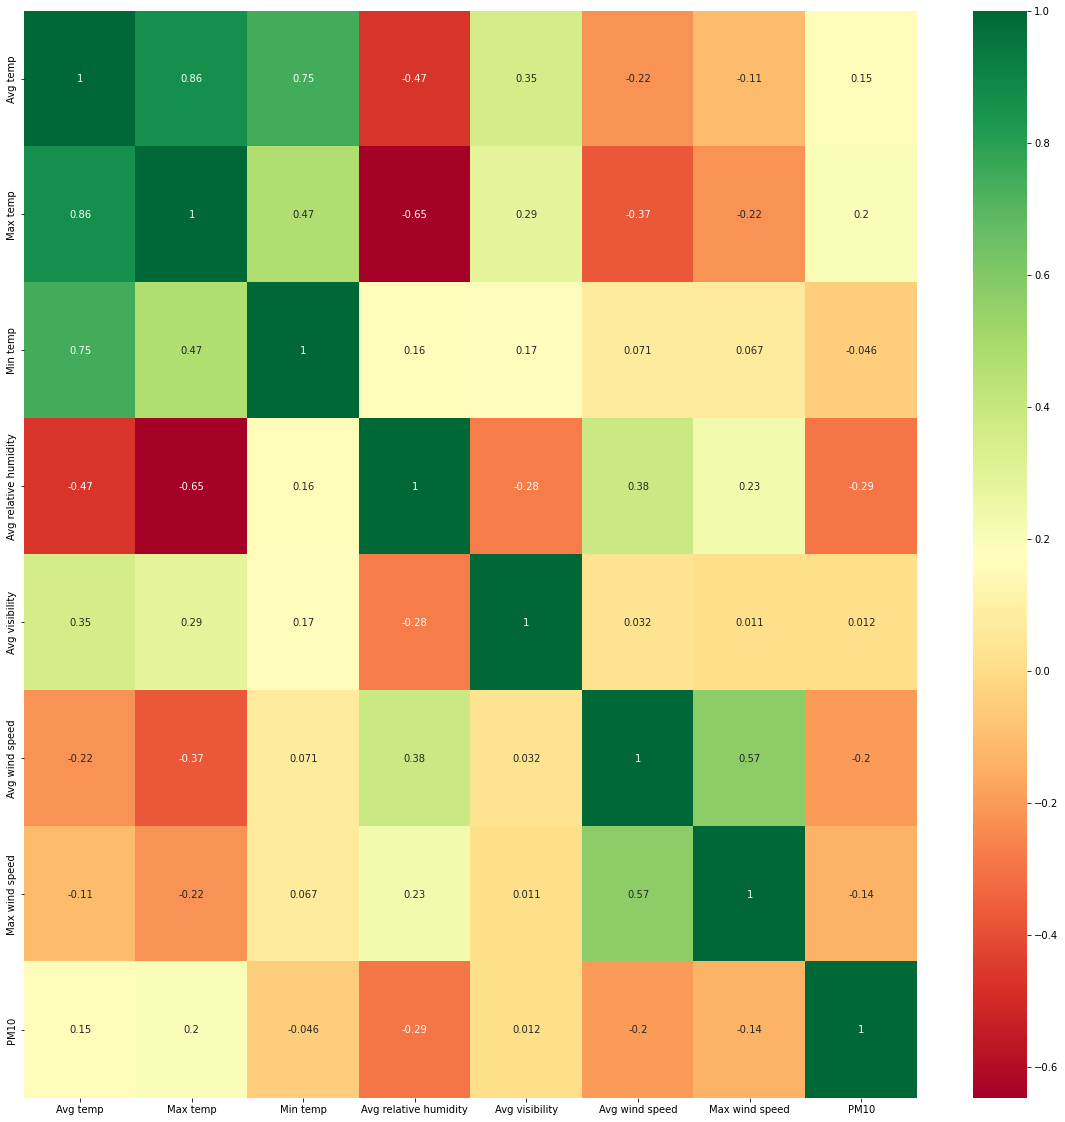

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We observe correlation values between the PM10 (dependent feature) and the independent features.



We are not removing any features eventhough the correlation values are low, as there are only few of them.

In [ ]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
y.head()

0    106.00
1     97.40
2    105.33
3     74.04
4     63.57
Name: PM10, dtype: float64

We can also view the feature importance using ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
X.head()

,Avg temp,Max temp,Min temp,Avg relative humidity,Avg visibility,Avg wind speed,Max wind speed
0,20.1,28.4,15.7,54.0,6.0,3.0,5.4
1,20.8,28.3,12.9,45.0,6.3,1.1,5.4
2,21.4,29.0,13.7,45.0,6.3,0.4,3.5
3,21.0,28.7,17.0,65.0,6.3,3.1,5.4
4,20.4,27.6,16.2,61.0,5.5,1.3,5.4


In [ ]:
#feature importance values in respective to the above features 
print(model.feature_importances_)


[0.14303269 0.16801098 0.13156859 0.2328827  0.09002073 0.1462355
 0.08824881]


These are the top 5 important features.

We can observe that 'Avg relative humidity' feature has the highest importance and 

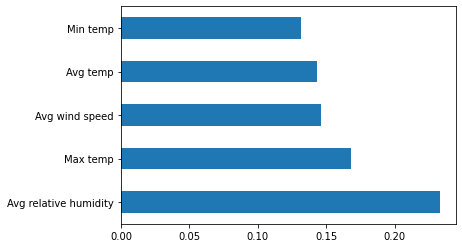

In [ ]:
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
df.to_csv('processed_data.csv')